<a href="https://colab.research.google.com/github/TheAmirHK/Quantum_Computation/blob/main/Bell_State(Two_qubits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Bell state**, also known as an entangled state, is a specific quantum state that two qubits can be in. The Bell states are unique in that they exhibit strong correlations between the two qubits, such that the measurement of one qubit instantaneously determines the state of the other qubit, regardless of the distance between them. There are four Bell states, and they are denoted as:

1.   $ |\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$
2.   $ |\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$
3.   $ |\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$
4.   $ |\Psi^-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$

These states are maximally entangled, meaning that the measurement of one qubit instantaneously determines the state of the other qubit, regardless of the distance between them.

In [ ]:
#!pip install qiskit qiskit_ibm_runtime pylatexenc qiskit_aer

In [5]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit_aer import AerSimulator
from math import pi
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
def plot_bloch(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return plot_bloch_multivector(result.get_statevector())

def state_vector(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return array_to_latex(statevector, prefix="\\text{statevector = }\n")



---


Bell state circuit 1 : $ |\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$



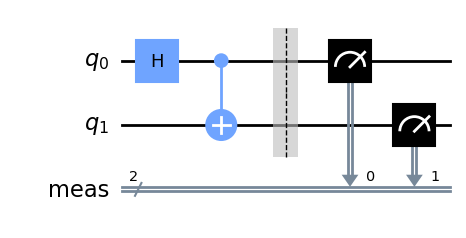

In [9]:
bell_circuit = QuantumCircuit(2)
bell_circuit.h(0)
bell_circuit.cx(0, 1)

bell_circuit.measure_all()
bell_circuit.draw(output='mpl')


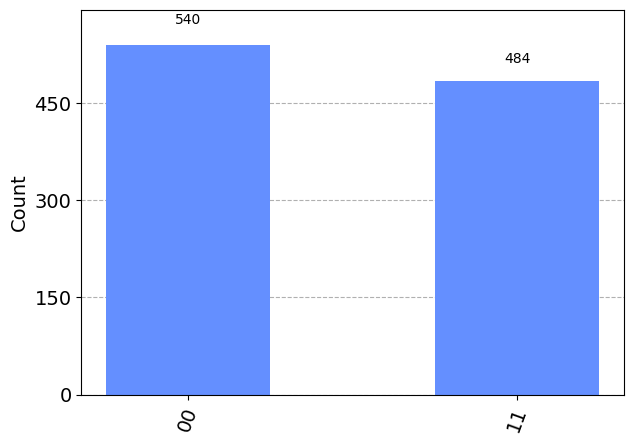

In [17]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(bell_circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)



---


Bell state circuit 2 :  $ |\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$

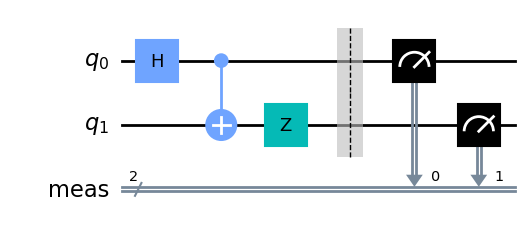

In [18]:
bell_circuit = QuantumCircuit(2)
bell_circuit.h(0)
bell_circuit.cx(0, 1)
bell_circuit.z(1)

bell_circuit.measure_all()
bell_circuit.draw(output='mpl')

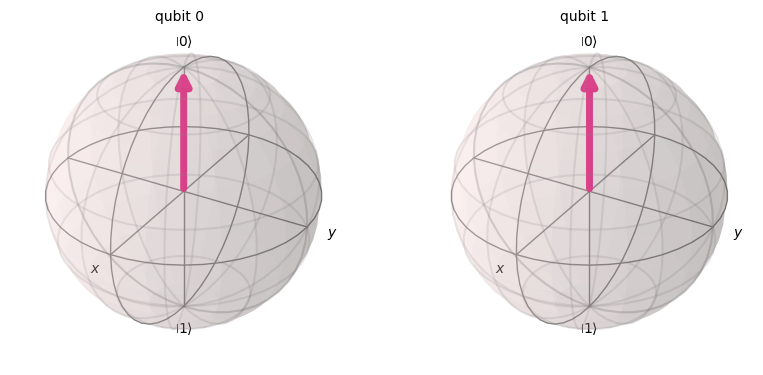

In [19]:
plot_bloch(bell_circuit)

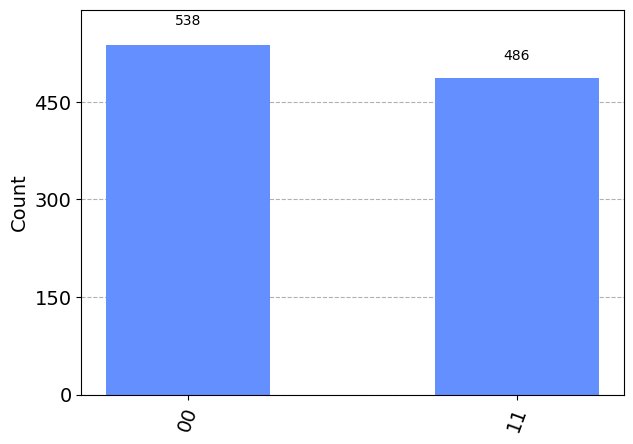

In [20]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(bell_circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)


---

Bell state circuit 3 : $ |\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$


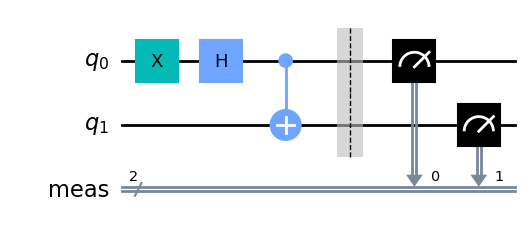

In [13]:
# |Ψ⁺⟩ = 1/sqrt(2) (|01⟩ + |10⟩)
bell_circuit = QuantumCircuit(2)
bell_circuit.x(0)
bell_circuit.h(0)
bell_circuit.cx(0, 1)

bell_circuit.measure_all()
bell_circuit.draw(output='mpl')

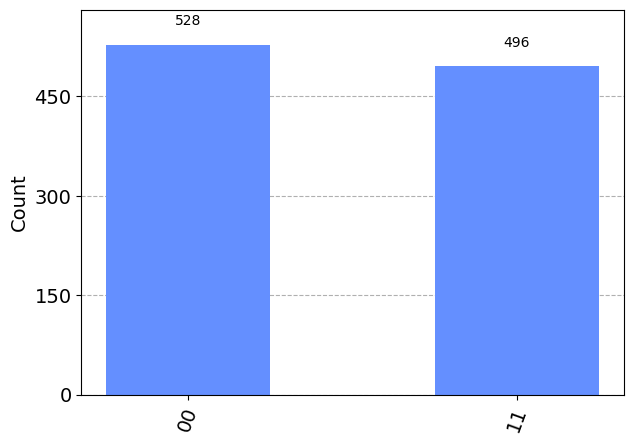

In [14]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(bell_circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)



---


Bell state circuit 4 : $ |\Psi^-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$

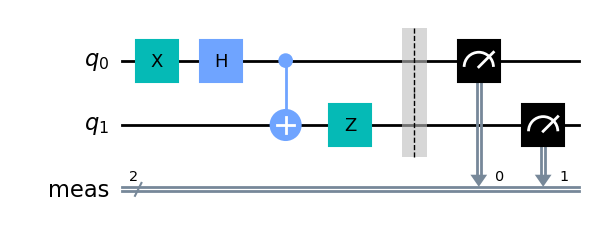

In [15]:
bell_circuit = QuantumCircuit(2)
bell_circuit.x(0)
bell_circuit.h(0)
bell_circuit.cx(0, 1)
bell_circuit.z(1)

bell_circuit.measure_all()
bell_circuit.draw(output='mpl')


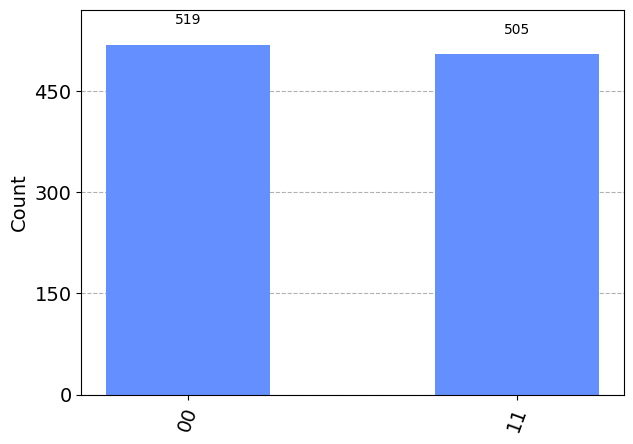

In [16]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(bell_circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector

# Create the GHZ states
ghz_circuits = []

# |GHZ⁺⟩ = 1/sqrt(2) (|000⟩ + |111⟩)
ghz_circuit = QuantumCircuit(3)
ghz_circuit.h(0)
ghz_circuit.cx(0, 1)
ghz_circuit.cx(0, 2)
ghz_circuits.append(ghz_circuit)

# |GHZ⁻⟩ = 1/sqrt(2) (|000⟩ - |111⟩)
ghz_circuit = QuantumCircuit(3)
ghz_circuit.h(0)
ghz_circuit.cx(0, 1)
ghz_circuit.cx(0, 2)
ghz_circuit.z(0)
ghz_circuit.z(1)
ghz_circuit.z(2)
ghz_circuits.append(ghz_circuit)

# Visualize the circuits
for i, circuit in enumerate(ghz_circuits):
    print(f"GHZ state |GHZ{i}⟩ circuit:")
    print(circuit)

GHZ state |GHZ0⟩ circuit:
     ┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
GHZ state |GHZ1⟩ circuit:
     ┌───┐          ┌───┐
q_0: ┤ H ├──■────■──┤ Z ├
     └───┘┌─┴─┐  │  ├───┤
q_1: ─────┤ X ├──┼──┤ Z ├
          └───┘┌─┴─┐├───┤
q_2: ──────────┤ X ├┤ Z ├
               └───┘└───┘
